<a href="https://colab.research.google.com/github/daje0601/e-comerce-project/blob/main/%ED%94%84%EB%A1%9C%EB%AA%A8%EC%85%98%ED%9A%A8%EC%9C%A8%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
cd /content/drive/MyDrive/fastcampus/이커머스/

/content/drive/MyDrive/fastcampus/이커머스


In [72]:
ls

advertising.csv  ecommerce.csv  member.csv
churn.csv        galaxy.csv     transaction.csv


In [73]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
member = pd.read_csv("member.csv")
transaction = pd.read_csv("transaction.csv")

In [75]:
member.head(2)

,id,recency,zip_code,is_referral,channel,conversion
0,906145,10,Surburban,0,Phone,0
1,184478,6,Rural,1,Web,0


recency : 마지막 거래 일  
zip_code : 우편번호가 가공된 데이터  
is_referral : 추천인이 있는지 없는지   
channel	: 웹과 폰 중에 어느 채널이 일용하였는지   
conversion : 프로모션 전환여부(target)

In [76]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           64000 non-null  int64 
 1   recency      64000 non-null  int64 
 2   zip_code     64000 non-null  object
 3   is_referral  64000 non-null  int64 
 4   channel      64000 non-null  object
 5   conversion   64000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.9+ MB


데이터가 너무 깨끗한.. 데이터 이다..

In [77]:
member.describe()

,id,recency,is_referral,conversion
count,64000.000000,64000.000000,64000.000000,64000.000000
mean,550694.137797,5.763734,0.502250,0.146781
std,259105.689773,3.507592,0.499999,0.353890
min,100001.000000,1.000000,0.000000,0.000000
25%,326772.000000,2.000000,0.000000,0.000000
50%,551300.000000,6.000000,1.000000,0.000000
75%,774914.500000,9.000000,1.000000,0.000000
max,999997.000000,12.000000,1.000000,1.000000


In [78]:
transaction.head(2)

,id,num_item,total_amount
0,906145,5,34000
1,906145,1,27000


id : 회원의 id   
num_item : 한번 거래에서 몇개의 item을 이용하였는지   
total_amount : 총 거래 금액   

In [79]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196836 entries, 0 to 196835
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   id            196836 non-null  int64
 1   num_item      196836 non-null  int64
 2   total_amount  196836 non-null  int64
dtypes: int64(3)
memory usage: 4.5 MB


In [80]:
transaction["avg_price"] = transaction["total_amount"] / transaction["num_item"]

In [81]:
df = transaction.groupby(by="id").mean()
df.head(2)

,num_item,total_amount,avg_price
id,,,
100001,3.5,26000.0,7500.0
100008,5.0,26000.0,5200.0


In [82]:
transaction_count = transaction["id"].value_counts()

In [83]:
transaction_df = pd.concat([df, transaction_count], axis=1)
transaction_df = transaction_df.rename(columns={"id":"count"})
transaction_df.head(2)

,num_item,total_amount,avg_price,count
100001,3.5,26000.0,7500.0,2
100008,5.0,26000.0,5200.0,1


In [84]:
member.set_index("id", inplace=True)

In [85]:
df = member.join(transaction_df)

In [86]:
print(df.isnull().sum())
print(df.nunique())

recency         0
zip_code        0
is_referral     0
channel         0
conversion      0
num_item        0
total_amount    0
avg_price       0
count           0
dtype: int64
recency           12
zip_code           3
is_referral        2
channel            3
conversion         2
num_item          50
total_amount     266
avg_price       8493
count              5
dtype: int64


In [87]:
df.nunique()

recency           12
zip_code           3
is_referral        2
channel            3
conversion         2
num_item          50
total_amount     266
avg_price       8493
count              5
dtype: int64

In [88]:
df.dtypes

recency           int64
zip_code         object
is_referral       int64
channel          object
conversion        int64
num_item        float64
total_amount    float64
avg_price       float64
count             int64
dtype: object

In [89]:
print(df.zip_code.value_counts())
print(df.channel.value_counts())

Surburban    28776
Urban        25661
Rural         9563
Name: zip_code, dtype: int64
Web             28217
Phone           28021
Multichannel     7762
Name: channel, dtype: int64


In [90]:
df = pd.get_dummies(df, columns=["zip_code", "channel"], drop_first=True)

In [91]:
df.head(2)

,recency,is_referral,conversion,num_item,total_amount,avg_price,count,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web
id,,,,,,,,,,,
906145,10,0,0,3.333333,31333.333333,14016.666667,3,1,0,1,0
184478,6,1,0,4.000000,29000.000000,7250.000000,1,0,0,0,1


In [92]:
df.conversion.value_counts(normalize=True)

0    0.853219
1    0.146781
Name: conversion, dtype: float64

In [93]:
from sklearn.model_selection import train_test_split


X = df.drop("conversion", axis=1)
y = df["conversion"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((51200, 10), (12800, 10), (51200,), (12800,))

In [94]:
# from imblearn.over_sampling import SMOTE, RandomOverSampler
# smote=SMOTE(sampling_strategy='auto', random_state=42)
# X_train, y_train =  smote.fit_sample(X_train, y_train)
# X_train.shape, y_train.shape

In [95]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=10, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [96]:
y_pred = model.predict(X_test)

In [97]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93     10939
           1       0.87      0.14      0.24      1861

    accuracy                           0.87     12800
   macro avg       0.87      0.57      0.58     12800
weighted avg       0.87      0.87      0.83     12800



In [98]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print("f1_score", f1_score(y_test, y_pred))

0.871875
0.8745762711864407
0.138635142396561
f1_score 0.23933209647495363


# RandomForest Regressor



In [99]:
from sklearn.ensemble import RandomForestRegressor

In [100]:
rf = RandomForestRegressor(max_depth=10, random_state=42)

In [101]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [102]:
y_pred = rf.predict(X_test)

In [103]:
def conv(x):
  if x >= 0.5:
    return 1
  else:
    return 0

In [104]:
pd.Series(y_pred).apply(lambda x: conv(x))

0        0
1        0
2        0
3        0
4        0
        ..
12795    0
12796    0
12797    0
12798    0
12799    0
Length: 12800, dtype: int64

In [105]:
y_pred = [1 if x >= 0.9 else 0 for x in y_pred]

In [106]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print("f1_score", f1_score(y_test, y_pred))

0.867734375
0.9883720930232558
0.09134873723804406
f1_score 0.1672405312346286


In [107]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93     10939
           1       0.99      0.09      0.17      1861

    accuracy                           0.87     12800
   macro avg       0.93      0.55      0.55     12800
weighted avg       0.88      0.87      0.82     12800



# Hyperparameter Tuning

In [108]:
rf = RandomForestRegressor(max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred = [1 if x >= 0.5 else 0 for x in y_pred]
print(accuracy_score(y_test, y_pred))

0.87875


In [109]:
rf = RandomForestRegressor(n_estimators=100, max_depth=12, random_state=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred = [1 if x >= 0.5 else 0 for x in y_pred]
print(accuracy_score(y_test, y_pred))

0.880546875


In [110]:
rf.feature_importances_

array([0.06356246, 0.02069394, 0.30099493, 0.16608727, 0.26929528,
       0.13935264, 0.00986312, 0.00915189, 0.01026363, 0.01073483])

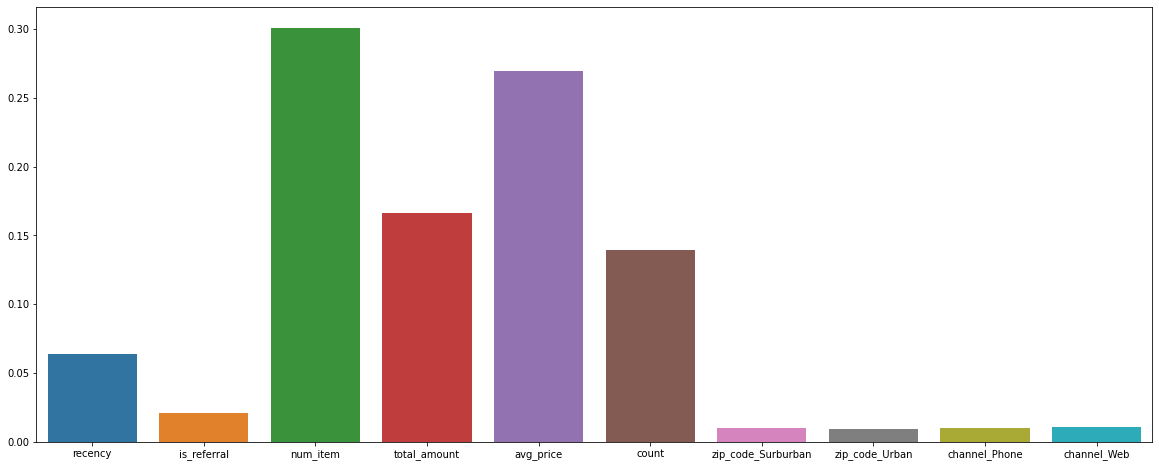

In [116]:
plt.figure(figsize=(20, 8))
sns.barplot(x = X_train.columns, y= rf.feature_importances_);